In [60]:
import numpy as np
import math


 # 定义一个Kmeans类
class KMeans:
  def __init__(self,K,data,threshold=0.1):
    self.center = []
    self.K = K
    self.threshold = threshold
    self.data = data
    l = int(len(data) / K)
    for center_index in range(self.K):
    # 根据用户输入的数据随机选择三个质心
    # 我这里通过除法直接计算出随机数据
    # 150 / 3 = 50
    # 0 50 100
      self.center.append(self.data[(center_index)*l])

  # 通过循环的方式，使其能够支持多维的空间
  # 计算欧式距离
  def __euclid_distance(self,point_one,point_two):
    total = 0
    for i in range(len(point_one)):
      total = total + math.pow(point_one[i] - point_two[i],2)
    return math.sqrt(total)

  # 计算点到质心的距离。
  # centers代表质心 points代表点
  def __calc_distance(self):
    # 通过欧式距离计算两个点之间的距离
    distances = []
    # 创建好列表，存放数据
    indexs = []
    for c in range(self.K):
      distance = []
      index = []
      distances.append(distance)
      indexs.append(index)
      
    # 计算各个点的欧式距离
    for index,point in enumerate(self.data):
      min_list = []
      min = 9999999999
      min_index = 0
      for c in range(self.K):
        get_min = self.__euclid_distance(point,self.center[c])
        if get_min < min:
          min = get_min
          min_index = c
      distances[min_index].append(point)
      indexs[min_index].append(index)

    return distances,indexs

  # 计算x，y，z列各列的平均值
  def __calc_xyz_avg(self,xyzs):
    l = []
    for i in range(len(xyzs)):
      x_sum = 0
      y_sum = 0
      z_sum = 0
      for j in xyzs[i]:
        x_sum = x_sum + j[0]
        y_sum = y_sum + j[1]
        z_sum = z_sum + j[2]
      x_sum = x_sum / len(xyzs[i])
      y_sum = y_sum / len(xyzs[i])
      z_sum = z_sum / len(xyzs[i])
      l.append((x_sum,y_sum,z_sum))
    return l
  # def __calc_xyz_avg(self,distances):
  #   l = []
  #   for i in range(len(distances)):
  #     n_sum = []
  #     for j in range(len(distances[i][0])):
  #       n_sum.append(0)
  #     for j in distances[i]:
  #       for z in range(len(distances[i][0])):
  #         n_sum[z] = n_sum[z] + j[z]
  #     for j in range(len(distances[i][0])):
  #       n_sum[j] = n_sum[j] / len(distances[i])
  #     l.append(n_sum)
  #   return l


  def get_center(self):
    return self.center

  def get_data(self):
    return self.data

  # 进行预测
  def predict(self):
    iterate_index = 1
    # 从下面开始执行循环，知道小于一个阈值
    flag = True
    while flag:
      distances,indexs = self.__calc_distance()
      # 计算出新的平均数
      print(self.center)
      cxa = self.__calc_xyz_avg(distances)
      print(cxa)
      correct_num = 0
      print("K-means epoch:%s"%(iterate_index))
      iterate_index = iterate_index + 1
      # 计算原始centers和cxa之间的距离，如果小于某一个值就认为结束了。
      for i in range(len(self.center)):
        if self.__euclid_distance(self.center[i],cxa[i]) < self.threshold:
          correct_num = correct_num + 1
      if correct_num == len(self.center):
        flag = False
      else:
        self.centers = cxa
    print("complete!")
    return (cd,indexs) 


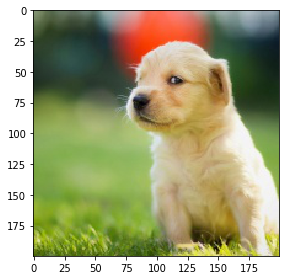

In [55]:
# 读取数据
from skimage import io
image = io.imread('/content/demo.jpg')
io.imshow(image)
io.show()

In [56]:
# 获取行和列
rows = image.shape[0]
cols = image.shape[1]
print(rows,cols)

200 200


In [57]:
x = image.reshape(rows*cols,3)

In [61]:
k = KMeans(K=2,data=x,threshold=1)

In [62]:
(group,indexs) = k.predict()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: overflow encountered in ubyte_scalars


[array([134, 150, 121], dtype=uint8), array([139, 168,  88], dtype=uint8)]
[(137.82335904297182, 137.21926648827326, 87.19877223359043), (161.03035822707955, 164.4688524590164, 106.62914389799636)]
K-means epoch:1
[array([134, 150, 121], dtype=uint8), array([139, 168,  88], dtype=uint8)]
[(137.82335904297182, 137.21926648827326, 87.19877223359043), (161.03035822707955, 164.4688524590164, 106.62914389799636)]
K-means epoch:2
[array([134, 150, 121], dtype=uint8), array([139, 168,  88], dtype=uint8)]
[(137.82335904297182, 137.21926648827326, 87.19877223359043), (161.03035822707955, 164.4688524590164, 106.62914389799636)]
K-means epoch:3
[array([134, 150, 121], dtype=uint8), array([139, 168,  88], dtype=uint8)]
[(137.82335904297182, 137.21926648827326, 87.19877223359043), (161.03035822707955, 164.4688524590164, 106.62914389799636)]
K-means epoch:4
[array([134, 150, 121], dtype=uint8), array([139, 168,  88], dtype=uint8)]
[(137.82335904297182, 137.21926648827326, 87.19877223359043), (161.03

KeyboardInterrupt: ignored

In [ ]:
# 对所有相近的像素都对center的像素值进行替换
# 这里需要注意的是，类型需要转换成为int
for index,center in enumerate(np.array(centers,dtype=int)):
  # print(center)
  for i in indexs[index]:
    x[i] = center

In [ ]:
# 重新转换成原先图片的shape，然后进行显示
origin_x = x.reshape(rows,cols,3)